In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.listdir()

['Week 6 - Advanced Pandas and Visualization - Inclass Exercise',
 'Orders.csv',
 '.DS_Store',
 'Untitled.ipynb',
 'Superstore.csv',
 'Course Project - Zomato Case Study',
 'Week 6 - Advanced Pandas and Visualization - Deck.pdf',
 'Week 6 - Advanced Pandas and Visualization - Practise Exercise',
 '.ipynb_checkpoints',
 'Week 6 - Advanced Pandas and Visualization - Faculty Notebook',
 'returns.csv']

In [4]:
df = pd.read_csv("Superstore.csv")

In [5]:
df.shape

(9994, 21)

In [7]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [8]:
df["Cust_Name"] = df["Customer Name"].apply(lambda name : name.lower())

In [9]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cust_Name
0,1,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,claire gute


In [10]:
df["Cust_Name"].apply(len)

0       11
1       11
2       15
3       14
4       14
        ..
9989    16
9990    11
9991    11
9992    11
9993    12
Name: Cust_Name, Length: 9994, dtype: int64

In [19]:
df.sort_values(by = "Sales", ascending=False).head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cust_Name
2697,2698,CA-2014-145317,18/03/14,23/03/14,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.5,-1811.0784,sean miller
6826,6827,CA-2016-118689,02/10/16,09/10/16,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.9760,tamara chand


In [20]:
def sales_bucket(s):
    if s >= 0 and s <= 500:
        return "Sales 0 - 500"
    elif s > 500 and s <= 1000:
        return "Sales 500 - 1000"
    elif s > 1000 and s <= 5000:
        return "Sales 1000 - 5000"
    else:
        return "Sales > 5000"

In [23]:
sales_bucket(11484)

'Sales > 5000'

In [25]:
newdf = df[["Order ID","Order Date","Region","Segment","Category","Sub-Category","State","Sales","Quantity","Profit"]].copy()

In [27]:
newdf.head(2)

,Order ID,Order Date,Region,Segment,Category,Sub-Category,State,Sales,Quantity,Profit
0,CA-2016-152156,08/11/16,South,Consumer,Furniture,Bookcases,Kentucky,261.96,2,41.9136
1,CA-2016-152156,08/11/16,South,Consumer,Furniture,Chairs,Kentucky,731.94,3,219.5820


In [30]:
newdf["Sales_Bucket"] = newdf.apply(lambda x : sales_bucket(x['Sales']), axis = 1)

CPU times: user 42 ms, sys: 2.28 ms, total: 44.3 ms
Wall time: 43.2 ms


In [31]:
newdf.head()

,Order ID,Order Date,Region,Segment,Category,Sub-Category,State,Sales,Quantity,Profit,Sales_Bucket
0,CA-2016-152156,08/11/16,South,Consumer,Furniture,Bookcases,Kentucky,261.9600,2,41.9136,Sales 0 - 500
1,CA-2016-152156,08/11/16,South,Consumer,Furniture,Chairs,Kentucky,731.9400,3,219.5820,Sales 500 - 1000
2,CA-2016-138688,12/06/16,West,Corporate,Office Supplies,Labels,California,14.6200,2,6.8714,Sales 0 - 500
3,US-2015-108966,11/10/15,South,Consumer,Furniture,Tables,Florida,957.5775,5,-383.0310,Sales 500 - 1000
4,US-2015-108966,11/10/15,South,Consumer,Office Supplies,Storage,Florida,22.3680,2,2.5164,Sales 0 - 500


In [43]:
newdf["Sales_Bucket_1"] = np.where((newdf["Sales"] >= 0) & (newdf["Sales"] <= 500), "Sales 0 - 500",
                                   np.where((newdf["Sales"] > 500) & (newdf["Sales"] <= 1000),
                                            "Sales 500 - 1000",np.where((newdf["Sales"] > 1000) & (newdf["Sales"] <= 5000),
                                                                        "Sales 1000 - 5000","Sales > 5000")))

In [44]:
newdf.head(2)

,Order ID,Order Date,Region,Segment,Category,Sub-Category,State,Sales,Quantity,Profit,Sales_Bucket,Result,Sales_Bucket_1
0,CA-2016-152156,08/11/16,South,Consumer,Furniture,Bookcases,Kentucky,261.96,2,41.9136,Sales 0 - 500,South--Kentucky,Sales 0 - 500
1,CA-2016-152156,08/11/16,South,Consumer,Furniture,Chairs,Kentucky,731.94,3,219.5820,Sales 500 - 1000,South--Kentucky,Sales 500 - 1000


In [33]:
newdf["Sales_Bucket"].value_counts().to_frame()

,count
Sales_Bucket,
Sales 0 - 500,8832
Sales 500 - 1000,694
Sales 1000 - 5000,449
Sales > 5000,19


In [45]:
newdf["Sales_Bucket_1"].value_counts().to_frame()

,count
Sales_Bucket_1,
Sales 0 - 500,8832
Sales 500 - 1000,694
Sales 1000 - 5000,449
Sales > 5000,19


<Axes: ylabel='Sales_Bucket'>

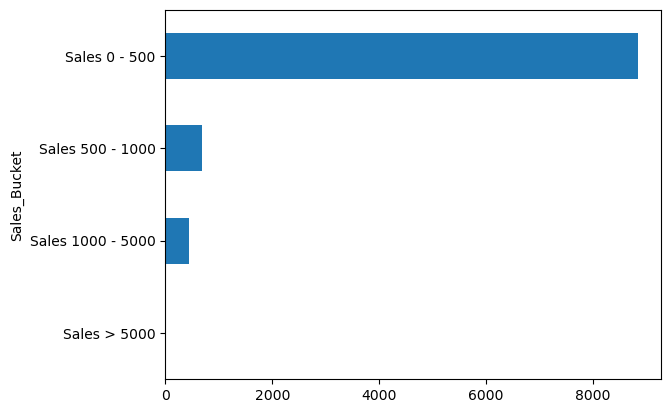

In [35]:
newdf["Sales_Bucket"].value_counts(ascending=True).plot(kind='barh')

In [36]:
def concatenate(col1, col2):
    return str(col1) + "--" + str(col2)

In [37]:
concatenate("Abhisheak","Saraswat")

'Abhisheak--Saraswat'

In [39]:
newdf["Result"] = newdf.apply(lambda x : concatenate(x["Region"],x["State"]), axis = 1)

In [40]:
newdf.head()

,Order ID,Order Date,Region,Segment,Category,Sub-Category,State,Sales,Quantity,Profit,Sales_Bucket,Result
0,CA-2016-152156,08/11/16,South,Consumer,Furniture,Bookcases,Kentucky,261.9600,2,41.9136,Sales 0 - 500,South--Kentucky
1,CA-2016-152156,08/11/16,South,Consumer,Furniture,Chairs,Kentucky,731.9400,3,219.5820,Sales 500 - 1000,South--Kentucky
2,CA-2016-138688,12/06/16,West,Corporate,Office Supplies,Labels,California,14.6200,2,6.8714,Sales 0 - 500,West--California
3,US-2015-108966,11/10/15,South,Consumer,Furniture,Tables,Florida,957.5775,5,-383.0310,Sales 500 - 1000,South--Florida
4,US-2015-108966,11/10/15,South,Consumer,Office Supplies,Storage,Florida,22.3680,2,2.5164,Sales 0 - 500,South--Florida


In [46]:
arr = np.random.randint(low = 10, high = 10000, size = 500)

In [47]:
arr[:5]

array([8867, 4820, 9372, 7564, 6408])

In [48]:
 np.where((arr >= 0) & (arr <= 500), "Sales 0 - 500", np.where((arr > 500) & (arr <= 1000),
            "Sales 500 - 1000",np.where((arr > 1000) & (arr <= 5000),"Sales 1000 - 5000","Sales > 5000")))

array(['Sales > 5000', 'Sales 1000 - 5000', 'Sales > 5000',
       'Sales > 5000', 'Sales > 5000', 'Sales > 5000',
       'Sales 1000 - 5000', 'Sales 1000 - 5000', 'Sales > 5000',
       'Sales 1000 - 5000', 'Sales > 5000', 'Sales > 5000',
       'Sales 1000 - 5000', 'Sales > 5000', 'Sales 1000 - 5000',
       'Sales 1000 - 5000', 'Sales > 5000', 'Sales > 5000',
       'Sales > 5000', 'Sales > 5000', 'Sales > 5000',
       'Sales 1000 - 5000', 'Sales 1000 - 5000', 'Sales 1000 - 5000',
       'Sales 1000 - 5000', 'Sales 1000 - 5000', 'Sales > 5000',
       'Sales 1000 - 5000', 'Sales > 5000', 'Sales > 5000',
       'Sales > 5000', 'Sales > 5000', 'Sales 1000 - 5000',
       'Sales > 5000', 'Sales 0 - 500', 'Sales 1000 - 5000',
       'Sales 1000 - 5000', 'Sales > 5000', 'Sales > 5000',
       'Sales 1000 - 5000', 'Sales 1000 - 5000', 'Sales 1000 - 5000',
       'Sales > 5000', 'Sales > 5000', 'Sales 1000 - 5000',
       'Sales 1000 - 5000', 'Sales > 5000', 'Sales 1000 - 5000',
       'S

### Pivot Table

In [52]:
# pd.pivot_table

In [53]:
newdf.head()

,Order ID,Order Date,Region,Segment,Category,Sub-Category,State,Sales,Quantity,Profit,Sales_Bucket,Result,Sales_Bucket_1
0,CA-2016-152156,08/11/16,South,Consumer,Furniture,Bookcases,Kentucky,261.9600,2,41.9136,Sales 0 - 500,South--Kentucky,Sales 0 - 500
1,CA-2016-152156,08/11/16,South,Consumer,Furniture,Chairs,Kentucky,731.9400,3,219.5820,Sales 500 - 1000,South--Kentucky,Sales 500 - 1000
2,CA-2016-138688,12/06/16,West,Corporate,Office Supplies,Labels,California,14.6200,2,6.8714,Sales 0 - 500,West--California,Sales 0 - 500
3,US-2015-108966,11/10/15,South,Consumer,Furniture,Tables,Florida,957.5775,5,-383.0310,Sales 500 - 1000,South--Florida,Sales 500 - 1000
4,US-2015-108966,11/10/15,South,Consumer,Office Supplies,Storage,Florida,22.3680,2,2.5164,Sales 0 - 500,South--Florida,Sales 0 - 500


In [56]:
pd.pivot_table(data = newdf, index = ["Region"], values = ["Sales"])
# by default pivot table calc avg of the data

,Sales
Region,
Central,215.772661
East,238.336110
South,241.803645
West,226.493233


In [57]:
sum(newdf["Sales"])

2297200.8603

In [58]:
# how to get avg sales of central region without using pivot and group by

In [62]:
np.mean(newdf[newdf["Region"] == "Central"]["Sales"])

215.77266069737408

In [64]:
pd.pivot_table(data = newdf, index = ["Region"], values = ["Sales"],
              aggfunc="sum")

,Sales
Region,
Central,501239.8908
East,678781.2400
South,391721.9050
West,725457.8245


In [63]:
np.sum(newdf[newdf["Region"] == "Central"]["Sales"])

501239.8908

In [65]:
np.max(newdf[newdf["Region"] == "Central"]["Sales"])

17499.95

In [67]:
pd.pivot_table(data = newdf, index = ["Region"], values = ["Sales"],
              aggfunc=["max","min","mean","sum","count"])

,max,min,mean,sum,count
,Sales,Sales,Sales,Sales,Sales
Region,,,,,
Central,17499.950,0.444,215.772661,501239.8908,2323
East,11199.968,0.852,238.336110,678781.2400,2848
South,22638.480,1.167,241.803645,391721.9050,1620
West,13999.960,0.990,226.493233,725457.8245,3203


In [70]:
pd.pivot_table(data = newdf, index = ["Region"], values = ["Sales","Profit"],
              aggfunc= {"Sales" : "mean","Profit" : "sum"})

,Profit,Sales
Region,,
Central,39706.3625,215.772661
East,91522.7800,238.336110
South,46749.4303,241.803645
West,108418.4489,226.493233


In [71]:
pd.pivot_table(data = newdf, index = ["Region"], values = ["Sales","Profit"],
              aggfunc= {"Sales" : ["max", "mean"],"Profit" : ["sum","mean"]})

Profit                   Sales            
              mean          sum        max        mean
Region                                                
Central  17.092709   39706.3625  17499.950  215.772661
East     32.135808   91522.7800  11199.968  238.336110
South    28.857673   46749.4303  22638.480  241.803645
West     33.849032  108418.4489  13999.960  226.493233

In [72]:
pd.pivot_table(data = newdf, index = "Region", columns="Segment", values = "Sales", aggfunc="sum")

Segment,Consumer,Corporate,Home Office
Region,,,
Central,252031.434,157995.8128,91212.6440
East,350908.167,200409.3470,127463.7260
South,195580.971,121885.9325,74255.0015
West,362880.773,225855.2745,136721.7770


In [75]:
pd.pivot_table(data = newdf, index = "Region", columns="Segment", 
               values = "Quantity", aggfunc="sum",
               margins=True, margins_name="Grand Total")

Segment,Consumer,Corporate,Home Office,Grand Total
Region,,,,
Central,4519,2604,1657,8780
East,5347,3358,1913,10618
South,3178,2016,1015,6209
West,6477,3630,2159,12266
Grand Total,19521,11608,6744,37873


In [83]:
pd.pivot_table(data = newdf, index = "State", columns="Segment", 
               values = "Quantity", aggfunc="sum",
               margins=True, margins_name="Grand Total",
              fill_value="No-Sales")

Segment,Consumer,Corporate,Home Office,Grand Total
State,,,,
Alabama,102,130,24,256
Arizona,430,268,164,862
Arkansas,148,56,36,240
California,4081,2291,1295,7667
Colorado,382,200,111,693
Connecticut,149,94,38,281
Delaware,186,146,35,367
District of Columbia,24,No-Sales,16,40
Florida,596,536,247,1379


In [87]:
pd.pivot_table(data = newdf, index = ["Region","Category"], columns = "Segment",values = "Quantity",
               aggfunc="sum")# .reset_index()

Segment                  Consumer  Corporate  Home Office
Region  Category                                         
Central Furniture             952        542          333
        Office Supplies      2777       1605         1027
        Technology            790        457          297
East    Furniture            1114        723          377
        Office Supplies      3245       2035         1182
        Technology            988        600          354
South   Furniture             695        415          181
        Office Supplies      1899       1281          620
        Technology            584        320          214
West    Furniture            1405        815          476
        Office Supplies      3837       2097         1301
        Technology           1235        718          382

### Pandas Groupy

In [90]:
newdf.groupby('Region')["Sales"].sum()

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [91]:
newdf.groupby(["Region","Segment"])["Sales"].mean()

Region   Segment    
Central  Consumer       207.946728
         Corporate      234.763466
         Home Office    208.248046
East     Consumer       238.875539
         Corporate      228.516929
         Home Office    253.911805
South    Consumer       233.390180
         Corporate      238.992025
         Home Office    272.996329
West     Consumer       217.033955
         Corporate      235.265911
         Home Office    239.442692
Name: Sales, dtype: float64

In [92]:
newdf.groupby(["Region","Segment"]).agg({"Sales" : "sum", "Region" : "count"})

Sales  Region
Region  Segment                         
Central Consumer     252031.4340    1212
        Corporate    157995.8128     673
        Home Office   91212.6440     438
East    Consumer     350908.1670    1469
        Corporate    200409.3470     877
        Home Office  127463.7260     502
South   Consumer     195580.9710     838
        Corporate    121885.9325     510
        Home Office   74255.0015     272
West    Consumer     362880.7730    1672
        Corporate    225855.2745     960
        Home Office  136721.7770     571

In [93]:
newdf.groupby(["Region","Segment"]).agg({"Sales" : ["sum","mean"]})

Sales            
                             sum        mean
Region  Segment                             
Central Consumer     252031.4340  207.946728
        Corporate    157995.8128  234.763466
        Home Office   91212.6440  208.248046
East    Consumer     350908.1670  238.875539
        Corporate    200409.3470  228.516929
        Home Office  127463.7260  253.911805
South   Consumer     195580.9710  233.390180
        Corporate    121885.9325  238.992025
        Home Office   74255.0015  272.996329
West    Consumer     362880.7730  217.033955
        Corporate    225855.2745  235.265911
        Home Office  136721.7770  239.442692

### Crosstab in Pandas

In [94]:
people = pd.read_csv("people.csv")

In [96]:
people.head()

,Age,Gender,Hometown,Height,Qualification,Smoker
0,45,Male,Mumbai,167,Graduate,Yes
1,23,Female,Mumbai,170,Graduate,No
2,27,Male,Mumbai,175,Post-graduate,No
3,34,Male,Delhi,155,Graduate,No
4,43,Female,Mumbai,157,Post-graduate,Yes


In [98]:
# pd.crosstab?

In [100]:
people[people["Hometown"] == "Mumbai"]

,Age,Gender,Hometown,Height,Qualification,Smoker
0,45,Male,Mumbai,167,Graduate,Yes
1,23,Female,Mumbai,170,Graduate,No
2,27,Male,Mumbai,175,Post-graduate,No
4,43,Female,Mumbai,157,Post-graduate,Yes
6,44,Female,Mumbai,165,Graduate,Yes
11,28,Female,Mumbai,165,Diploma,No
13,59,Female,Mumbai,175,Graduate,No
15,43,Female,Mumbai,155,Post-graduate,No
16,56,Female,Mumbai,151,Graduate,No


In [102]:
pd.crosstab(people["Qualification"], people["Hometown"], margins=True)

Hometown,Bangalore,Delhi,Mumbai,All
Qualification,,,,
Diploma,2,3,1,6
Graduate,1,2,5,8
Post-graduate,3,1,3,7
All,6,6,9,21


In [105]:
newdf.head(2)

,Order ID,Order Date,Region,Segment,Category,Sub-Category,State,Sales,Quantity,Profit,Sales_Bucket,Result,Sales_Bucket_1
0,CA-2016-152156,08/11/16,South,Consumer,Furniture,Bookcases,Kentucky,261.96,2,41.9136,Sales 0 - 500,South--Kentucky,Sales 0 - 500
1,CA-2016-152156,08/11/16,South,Consumer,Furniture,Chairs,Kentucky,731.94,3,219.5820,Sales 500 - 1000,South--Kentucky,Sales 500 - 1000


In [106]:
pd.crosstab(df["Region"],df["Category"], values = df["Sales"], aggfunc="sum")

Category,Furniture,Office Supplies,Technology
Region,,,
Central,163797.1638,167026.415,170416.312
East,208291.2040,205516.055,264973.981
South,117298.6840,125651.313,148771.908
West,252612.7435,220853.249,251991.832


In [108]:
pd.crosstab(df["Region"],df["Category"], normalize="index")

Category,Furniture,Office Supplies,Technology
Region,,,
Central,0.207060,0.612139,0.180801
East,0.211025,0.601124,0.187851
South,0.204938,0.614198,0.180864
West,0.220731,0.592257,0.187012


In [120]:
type(pd.crosstab(df["Region"],df["Category"], normalize=True))

pandas.core.frame.DataFrame

In [121]:
type(pd.crosstab(index = [df["Region"],df["Category"]], columns = df["Segment"]))

pandas.core.frame.DataFrame

In [122]:
newdf.head()

,Order ID,Order Date,Region,Segment,Category,Sub-Category,State,Sales,Quantity,Profit,Sales_Bucket,Result,Sales_Bucket_1
0,CA-2016-152156,08/11/16,South,Consumer,Furniture,Bookcases,Kentucky,261.9600,2,41.9136,Sales 0 - 500,South--Kentucky,Sales 0 - 500
1,CA-2016-152156,08/11/16,South,Consumer,Furniture,Chairs,Kentucky,731.9400,3,219.5820,Sales 500 - 1000,South--Kentucky,Sales 500 - 1000
2,CA-2016-138688,12/06/16,West,Corporate,Office Supplies,Labels,California,14.6200,2,6.8714,Sales 0 - 500,West--California,Sales 0 - 500
3,US-2015-108966,11/10/15,South,Consumer,Furniture,Tables,Florida,957.5775,5,-383.0310,Sales 500 - 1000,South--Florida,Sales 500 - 1000
4,US-2015-108966,11/10/15,South,Consumer,Office Supplies,Storage,Florida,22.3680,2,2.5164,Sales 0 - 500,South--Florida,Sales 0 - 500


In [123]:
newdf.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [124]:
dct = {"Furniture" : "F", "Office Supplies" : "OS", "Technology" : "T"}

In [125]:
dct.keys()

dict_keys(['Furniture', 'Office Supplies', 'Technology'])

In [126]:
newdf["Abbr"] = newdf["Category"].map(dct)

In [127]:
newdf.head()

,Order ID,Order Date,Region,Segment,Category,Sub-Category,State,Sales,Quantity,Profit,Sales_Bucket,Result,Sales_Bucket_1,Abbr
0,CA-2016-152156,08/11/16,South,Consumer,Furniture,Bookcases,Kentucky,261.9600,2,41.9136,Sales 0 - 500,South--Kentucky,Sales 0 - 500,F
1,CA-2016-152156,08/11/16,South,Consumer,Furniture,Chairs,Kentucky,731.9400,3,219.5820,Sales 500 - 1000,South--Kentucky,Sales 500 - 1000,F
2,CA-2016-138688,12/06/16,West,Corporate,Office Supplies,Labels,California,14.6200,2,6.8714,Sales 0 - 500,West--California,Sales 0 - 500,OS
3,US-2015-108966,11/10/15,South,Consumer,Furniture,Tables,Florida,957.5775,5,-383.0310,Sales 500 - 1000,South--Florida,Sales 500 - 1000,F
4,US-2015-108966,11/10/15,South,Consumer,Office Supplies,Storage,Florida,22.3680,2,2.5164,Sales 0 - 500,South--Florida,Sales 0 - 500,OS


In [128]:
newdf[["Category","Abbr"]].head(10)

,Category,Abbr
0,Furniture,F
1,Furniture,F
2,Office Supplies,OS
3,Furniture,F
4,Office Supplies,OS
5,Furniture,F
6,Office Supplies,OS
7,Technology,T
8,Office Supplies,OS
9,Office Supplies,OS
